 在本章中的每一个模型都曾一度占据主导地位，其中许多模型都是ImageNet竞赛的优胜者。ImageNet竞赛自2010年以来，一直是计算机视觉中监督学习进展的指向标。这些模型包括：
- **AlexNet**:它是第一个在大规模视觉竞赛中击败传统计算机视觉模型的大型神经网络；
- **使用重复块的网络**（VGG）:它利用许多重复的神经网络块；
- **网络中的网络**（NiN）:它重复使用由卷积层和卷积层（用来代替全连接层）来构建深层网络;
- **含并行连结的网络**（GoogLeNet）:它使用并行连结的网络，通过不同窗口大小的卷积层和最大汇聚层来并行抽取信息；
- **残差网络**（ResNet）:它通过残差块构建跨层的数据通道，是计算机视觉中最流行的体系架构；
- **稠密连接网络**（DenseNet）:它的计算成本很高，但给我们带来了更好的效果。

虽然深度神经网络的概念非常简单——将神经网络堆叠在一起。但由于不同的网络架构和超参数选择，这些神经网络的性能会发生很大变化。

本章介绍的神经网络是将人类直觉和相关数学见解结合后，经过大量研究试错后的结晶。我们会按时间顺序介绍这些模型，在追寻历史的脉络的同时，帮助你培养对该领域发展的直觉。这将有助于你研究开发自己的架构。例如，本章介绍的**批量规范化**（batch normalization）和**残差网络**（ResNet）为设计和训练深度神经网络提供了重要思想指导。


# 7.1. 深度卷积神经网络（AlexNet）
虽然深度神经网络的概念非常简单——将神经网络堆叠在一起。但由于不同的网络架构和超参数选择，这些神经网络的性能会发生很大变化。

虽然上世纪90年代就有了一些神经网络加速卡，但仅靠它们还不足以开发出有大量参数的深层多通道多层卷积神经网络。此外，当时的数据集仍然相对较小。除了这些障碍，训练神经网络的一些关键技巧仍然缺失，包括**启发式参数初始化**、**随机梯度下降的变体**、**非挤压激活函数**和**有效的正则化技术**。

![](../img/7_13.png)
![](../img/7_14.png)
![](../img/7_15.png)


因此，与训练**端到端**（从像素到分类结果）系统不同，经典机器学习的流水线看起来更像下面这样：
1. 获取一个有趣的数据集。在早期，收集这些数据集需要昂贵的传感器（在当时最先进的图像也就100万像素）。
2. 根据光学、几何学、其他知识以及偶然的发现，手工对特征数据集进行预处理。
3. 通过标准的特征提取算法，如SIFT（尺度不变特征变换） `Lowe.2004`和SURF（加速鲁棒特征） `Bay.Tuytelaars.Van-Gool.2006`或其他手动调整的流水线来输入数据。
4. 将提取的特征送入最喜欢的分类器中（例如线性模型或其它核方法），以训练分类器。


端到端：从像素到分类结果；从音频到文本

## 7.1.1. 学习表征
#### 观察图像特征的提取方法
在2012年前，图像特征都是机械地计算出来的。事实上，设计一套新的特征函数、改进结果，并撰写论文是盛极一时的潮流。
![](../img/7_17.png)
#### 特征本身应该被学习
在合理地复杂性前提下，特征应该由多个共同学习的神经网络层组成，每个层都有可学习的参数。（AlexNet）在机器视觉中，最底层可能检测边缘、颜色和纹理。有趣的是，在网络的最底层，模型学习到了一些类似于传统滤波器的特征抽取器。

![](../img/7_1.png)

AlexNet的更高层建立在这些底层表示的基础上，以表示更大的特征，如眼睛、鼻子、草叶等等。而更高的层可以检测整个物体，如人、飞机、狗或飞盘。最终的隐藏神经元可以学习**图像的综合表示**，从而使属于不同类别的数据易于区分。尽管一直有一群执着的研究者不断钻研，试图学习**视觉数据的逐级表征**，然而很长一段时间里这些尝试都未有突破。深度卷积神经网络的突破出现在2012年。突破可归因于两个关键因素。

### 缺少的成分：数据
包含许多特征的深度模型需要大量的有标签数据，才能显著优于基于凸优化的传统方法（如线性方法和核方法）。ImageNet的挑战赛推动了计算机视觉和机器学习研究的发展，挑战研究人员确定哪些模型能够在更大的数据规模下表现最好。

### 缺少的成分：硬件
深度学习对计算资源要求很高，训练可能需要数百个迭代轮数，每次迭代都需要通过代价高昂的许多**线性代数层**传递数据。图形处理器（Graphics Processing Unit，GPU）早年用来加速图形处理，使电脑游戏玩家受益。GPU可优化高吞吐量的4x4矩阵和向量乘法，从而服务于基本的图形任务。

#### CPU与GPU
CPU的每个核心都拥有高时钟频率的运行能力，和高达数MB的三级缓存（L3Cache）。 它们非常适合执行各种指令，具有**分支预测器**、**深层流水线**和其他使CPU能够运行各种程序的功能。 然而，这种明显的优势也是它的致命弱点：通用核心的制造成本非常高。 它们需要大量的芯片面积、复杂的支持结构（内存接口、内核之间的缓存逻辑、高速互连等等），而且它们在任何单个任务上的性能都相对较差。 现代笔记本电脑最多有4核，即使是高端服务器也很少超过64核，因为它们的性价比不高。

GPU由$100 \sim 1000$个小的处理单元组成（NVIDIA、ATI、ARM和其他芯片供应商之间的细节稍有不同），通常被分成更大的组（NVIDIA称之为warps）。虽然每个GPU核心都相对较弱，有时甚至以低于1GHz的时钟频率运行，但**庞大的核心数量**使GPU比CPU快几个数量级。例如，NVIDIA最近一代的Ampere GPU架构为每个芯片提供了高达312 TFlops的浮点性能，而CPU的浮点性能到目前为止还没有超过1 TFlops。之所以有如此大的差距，原因其实很简单：首先，功耗往往会随时钟频率呈二次方增长。对于一个CPU核心，假设它的运行速度比GPU快4倍，你可以使用16个GPU内核取代，那么GPU的综合性能就是CPU的$16 \times 1/4 = 4$倍。其次，GPU内核要简单得多，这使得它们更节能。此外，深度学习中的许多操作需要相对较高的内存带宽，而GPU拥有10倍于CPU的带宽。

![](../img/7_16.png)

## 7.1.2. AlexNet
![](../img/7_2.png)

AlexNet和LeNet的设计理念非常相似，但也存在显著差异。 首先，AlexNet比相对较小的LeNet5要深得多。 AlexNet由八层组成：五个卷积层、两个全连接隐藏层和一个全连接输出层。 其次，AlexNet使用ReLU而不是sigmoid作为其激活函数。

### 模型设计
在AlexNet的第一层，卷积窗口的形状是$11\times11$。由于ImageNet中大多数图像的宽和高比MNIST图像的多10倍以上，因此，需要一个更大的卷积窗口来捕获目标。第二层中的卷积窗口形状被缩减为$5\times5$，然后是$3\times3$。此外，在第一层、第二层和第五层卷积层之后，加入窗口形状为$3\times3$、步幅为2的最大汇聚层。而且，AlexNet的卷积通道数目是LeNet的10倍。

在最后一个卷积层后有两个全连接层，分别有4096个输出。这两个巨大的全连接层拥有将近1GB的模型参数。由于早期GPU显存有限，原版的AlexNet采用了双数据流设计，使得每个GPU只负责存储和计算模型的一半参数。幸运的是，现在GPU显存相对充裕，所以我们现在很少需要跨GPU分解模型（因此，我们的AlexNet模型在这方面与原始论文稍有不同）。

### 激活函数
此外，AlexNet将sigmoid激活函数改为更简单的ReLU激活函数。一方面，ReLU激活函数的计算更简单，它不需要如sigmoid激活函数那般复杂的求幂运算。另一方面，当使用不同的参数初始化方法时，ReLU激活函数使训练模型更加容易。当sigmoid激活函数的输出非常接近于0或1时，这些区域的梯度几乎为0，因此反向传播无法继续更新一些模型参数。相反，ReLU激活函数在正区间的梯度总是1。因此，如果模型参数没有正确初始化，sigmoid函数可能在正区间内得到几乎为0的梯度，从而使模型无法得到有效的训练。

### 容量控制和预处理
AlexNet通过**暂退法**控制全连接层的模型复杂度，而LeNet只使用了**权重衰减**。为了进一步扩充数据，AlexNet在训练时增加了大量的**图像增强**数据，如翻转、裁切和变色。这使得模型更健壮，更大的样本量有效地减少了过拟合。


In [1]:
import torch
from torch import nn
from d2l import torch as d2l

net=nn.Sequential(
    # 这里，我们使用一个11*11的更大窗口来捕捉对象。
    # 同时，步幅为4，以减少输出的高度和宽度。
    # 另外，输出通道的数目远大于LeNet
    nn.Conv2d(in_channels=1,out_channels=96,kernel_size=11,stride=4,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    # 减小卷积窗口，使用填充为2来使得输入与输出的高和宽一致，且增大输出通道数
    nn.Conv2d(in_channels=96,out_channels=256,kernel_size=5,padding=2),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),

    # 使用三个连续的卷积层和较小的卷积窗口。
    # 除了最后的卷积层，输出通道的数量进一步增加。
    # 在前两个卷积层之后，汇聚层不用于减少输入的高度和宽度
    nn.Conv2d(in_channels=256,out_channels=384,kernel_size=3,padding=1),
    nn.ReLU(),
    nn.Conv2d(in_channels=384,out_channels=384,kernel_size=3,padding=1),
    nn.ReLU(),
    nn.Conv2d(in_channels=384,out_channels=256,kernel_size=3,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    nn.Flatten(),
    # 这里，全连接层的输出数量是LeNet中的好几倍。使用dropout层来减轻过拟合
    nn.Linear(6400,4096),
    nn.ReLU(),
    nn.Dropout(p=0.5),  # 50%的概率将输出置为0
    nn.Linear(4096,4096),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    # 最后是输出层。由于这里使用Fashion-MNIST，所以用类别数为10，而非论文中的1000
    nn.Linear(4096,10)
)

In [2]:
"""
构造一个高度和宽度都为224的单通道数据，来观察每一层输出的形状。 它与上图的AlexNet架构相匹配。
"""
X=torch.randn(128,1,224,224)

for layer in net:
    X=layer(X)
    print(layer.__class__.__name__,'output shape:\t',X.shape)

Conv2d output shape:	 torch.Size([128, 96, 54, 54])
ReLU output shape:	 torch.Size([128, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([128, 96, 26, 26])
Conv2d output shape:	 torch.Size([128, 256, 26, 26])
ReLU output shape:	 torch.Size([128, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([128, 256, 12, 12])
Conv2d output shape:	 torch.Size([128, 384, 12, 12])
ReLU output shape:	 torch.Size([128, 384, 12, 12])
Conv2d output shape:	 torch.Size([128, 384, 12, 12])
ReLU output shape:	 torch.Size([128, 384, 12, 12])
Conv2d output shape:	 torch.Size([128, 256, 12, 12])
ReLU output shape:	 torch.Size([128, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([128, 256, 5, 5])
Flatten output shape:	 torch.Size([128, 6400])
Linear output shape:	 torch.Size([128, 4096])
ReLU output shape:	 torch.Size([128, 4096])
Dropout output shape:	 torch.Size([128, 4096])
Linear output shape:	 torch.Size([128, 4096])
ReLU output shape:	 torch.Size([128, 4096])
Dropout output shape:	 torch.Size([128, 409

## 7.1.3 读取数据集
尽管本文中AlexNet是在ImageNet上进行训练的，但我们在这里使用的是Fashion-MNIST数据集。

将AlexNet直接应用于Fashion-MNIST的一个问题是，Fashion-MNIST图像的分辨率（28x28像素）低于ImageNet图像。 为了解决这个问题，我们将它们增加到224x224（通常来讲这不是一个明智的做法，但我们在这里这样做是为了有效使用AlexNet架构）。 我们使用d2l.load_data_fashion_mnist函数中的resize参数执行此调整。

In [3]:
batch_size=128
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size,resize=224)

## 7.1.4. 训练AlexNet
现在，我们可以开始训练AlexNet了。与 6.6节中的LeNet相比，这里的主要变化是使用更小的学习速率训练，这是因为网络更深更广、图像分辨率更高，训练卷积神经网络就更昂贵。

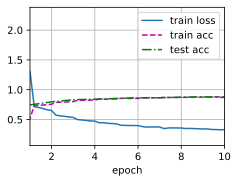

loss 0.329, train acc 0.879, test acc 0.870
1573.9 examples/sec on cuda:0


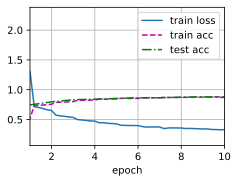

In [4]:
lr,num_epochs = 0.01,10

def train_ch6(net, train_iter, test_iter, num_epochs, lr, device):
    """Train a model with a GPU (defined in Chapter 6).

    Defined in :numref:`sec_lenet`"""
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)
    print('training on', device)
    net.to(device)
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])

    timer, num_batches = d2l.Timer(), len(train_iter)

    for epoch in range(num_epochs):
        # Sum of training loss, sum of training accuracy, no. of examples
        metric = d2l.Accumulator(3)
        net.train()
        for i, (X, y) in enumerate(train_iter):
            timer.start()
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad():
                metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
            timer.stop()
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (train_l, train_acc, None))
        test_acc = d2l.evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))

    animator.show()

    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec on {str(device)}')

train_ch6(net,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())

## 7.1.5. 小结
- AlexNet的架构与LeNet相似，但使用了**更多的卷积层**和**更多的参数**来拟合大规模的ImageNet数据集。
- 今天，AlexNet已经被更有效的架构所超越，但它是从浅层网络到深层网络的关键一步。
- 尽管AlexNet的代码只比LeNet多出几行，但学术界花了很多年才接受深度学习这一概念，并应用其出色的实验结果。这也是由于缺乏有效的计算工具。
- **Dropout、ReLU和预处理**是提升计算机视觉任务性能的其他关键步骤。